In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import module.conf as conf
import sklearn.metrics  as metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier

# matplotlib.use("QtCairo")
# %matplotlib tk

### Implement

1. Sigmoid: $y = f(x) = {1\over 1 + e^{-x}}$

In [55]:
def sigmoid(s: float) -> np.ndarray:
    return 1/(1 + np.exp(-s))

2. Gradient of Sigmoid: 
- $z_i = f(w^Tx_i+b_i) $
- $f(z_i)= sigmoid(w^Tx_i+b_i)$
- $P(y|X;w,b) = \prod\limits_{i=1}^{N}P(y_i | x_i; w, b) = \prod\limits_{i=1}^{N}z_{i}^{y_i}(1-z_{i})^{1-y_i}$
- $J(w,b) = -logP(y|X;w,b) = - \sum\limits_{i=1}^{N}(y_ilogz_i + (1-y_i)log(1-z_i))$
- $ w_i = w_{i-1} - \eta (z_i - y_i) x_i $

In [56]:
def grad_sigmoid(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray , lambda_:float = 1.):
    m, n = X.shape
    grad_w = np.zeros(shape=w.shape)
    grad_b = .0
    for i in range(m):
        zi = np.dot(w, X[i]) + b
        f = sigmoid(zi)
        delta_f_y = f - y[i]
        for j in range(n):
            grad_w[j] += delta_f_y * X[i, j]
            pass
        grad_b += delta_f_y
        pass
    for i in range(n):
        grad_w[i] += lambda_ * w[i]

    grad_w /= m
    grad_b /= m

    return grad_w, grad_b

# grad_sigmoid(w=np.asarray([0,0,0]), b=0, X=np.asarray([[1, 2, 3], [4, 5, 6]]), y=np.asarray([0, 1]))

In [57]:
def calc_grad_descent(X: np.ndarray, y_train: np.ndarray, w_0: np.ndarray, b_0: float, alpha: float, iter=1_000, stop_criteria:float = 1e-3):
    w = [w_0]
    b = [b_0]
    m, n = X.shape
    for _ in range(iter):
        grad_w, grad_b = grad_sigmoid(w[-1], b[-1], X, y_train)
        w_new = w[-1] - alpha * grad_w
        b_new = b[-1] - alpha * grad_b
        w.append(w_new)
        b.append(b_new)
        # if np.linalg.norm(grad_w) < stop_criteria:
        #     break
        pass
    return w, b

In [58]:
def cal_stochastic_grad_descent(X: np.ndarray, y_train: np.ndarray, w_0: np.ndarray, b_0: float, alpha: float, iter=10, stop_criteria:float = 1e-3):
    w = [w_0]
    b = [b_0]
    m, n = X.shape
    for _ in range(iter):
        indexes = np.random.permutation(m)
        for i in indexes:
            xi = X[i]
            yi = y_train[i]
            
            zi = np.dot(w[-1], xi) + b[-1]
            f = sigmoid(zi)
            delta_f_y = f - yi

            w_new = w[-1] - alpha * delta_f_y * xi
            b_new = b[-1] - alpha * delta_f_y

            w.append(w_new)
            b.append(b_new)
            
            pass
        # if grad_sigmoid(w[-1], b[-1], X, y_train) < stop_criteria: break
        # cost = sigmoid(w[-1] * X + b[-1])
        # if cost <= stop_criteria:
        #     break
        pass
    return w, b

### Create data

In [59]:
X = []
Y = []
N = 500
dimension = 10
# for i in range(N//2):
#     X.append(np.random.uniform(low=0, high=5, size=dimension))
#     Y.append(0)
#     pass
# for i in range(N - N//2):
#     X.append(np.random.uniform(low=5.5, high=10, size=dimension))
#     Y.append(1)
#     pass
# X = np.asarray(X)
# Y = np.asarray(Y)
# w_init = np.random.randn(1, dimension)s
# b_init: float = np.random.rand(1)
# max_0 = X[:, 0].max()
# w_init = X[np.any(X == max_0, axis=1)][-1]
# b_init = np.ceil(max_0)
# print(f"w:{w_init}\nb:{b_init}")
# np.save(file=conf.PROJECT_DIR + "/data/ml/X", arr=X)
# np.save(file=conf.PROJECT_DIR + "/data/ml/Y", arr=Y)
# np.save(file=conf.PROJECT_DIR + "/data/ml/w_init", arr=w_init)
# np.save(file="".join((conf.PROJECT_DIR, "/data/ml/b_init",)), arr=b_init)
X: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/X.npy",)))
Y: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/Y.npy",)))
# w_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/w_init.npy",)))
# b_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/b_init.npy",)))
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
# print(f"{X}")
# w_init = np.random.randn(dimension)
w_init = X[0]
b_init = np.random.rand()
# print(f"X:{X}\nY:{Y}")
print(f"w_init:{w_init}\nb_init:{(b_init)}")

w_init:[0.05518265 0.07067271 0.38425515 0.08452069 0.46458603 0.1890101
 0.16627643 0.09777954 0.10041589 0.16446739]
b_init:0.46519006533087326


In [117]:
iter = 1_000
iter_1 = 10
alpha = 1 #6e-1
# column matrix w_init
w_list, b_list = calc_grad_descent(X=X, y_train=Y, w_0=w_init, b_0=b_init, alpha=alpha, iter=iter, stop_criteria=alpha)
w_list_1, b_list_1 = cal_stochastic_grad_descent(X=X, y_train=Y, w_0=w_init, b_0=b_init, alpha=alpha, iter=iter_1, stop_criteria=alpha)
# alpha = 1e-3 iter = 10_000
# alpha = 3e-3 iter = 20_000
# alpha = 6e-1 iter = 1_000
print(f"w_list[-1]:{w_list[-1]}\nb_list[-1]:{b_list[-1]} after {iter} rounds")
print(f"\n")
print(f"w_list_1[-1]:{w_list_1[-1]}\nb_list[-1]:{b_list_1[-1]} after {iter_1} rounds")

w_list[-1]:[1.62978919 1.66861549 1.58821043 1.68984165 1.70514    1.64131573
 1.62792449 1.66380301 1.61136337 1.68188308]
b_list[-1]:-8.47978922893435 after 1000 rounds


w_list_1[-1]:[2.66070489 2.76762509 2.48620894 3.12294123 2.97300156 2.52060548
 2.64759694 2.71057025 2.54624021 2.81818502]
b_list[-1]:-13.816150630301907 after 10 rounds


In [118]:
logistic_regression = LogisticRegression(tol=1e-4, max_iter=10_000)
logistic_regression = logistic_regression.fit(X, Y)
print(f"w: {logistic_regression.coef_} b: {logistic_regression.intercept_}")

sgd_classifier = SGDClassifier(tol=1e-4, max_iter=10, loss="log_loss")
sgd_classifier.fit(X, Y)
print(f"w1: {sgd_classifier.coef_} b1: {sgd_classifier.intercept_}")

w: [[1.68589837 1.69968714 1.62737102 1.71845986 1.72266346 1.68514395
  1.67605796 1.70975566 1.66872473 1.69144448]] b: [-8.71388667]
w1: [[1.98285091 2.71150308 3.06446666 3.07572187 3.29061067 2.48253102
  3.06190876 3.10318294 2.59162987 2.74598986]] b1: [-14.50980637]


### Test

In [125]:
# sigmoid(np.dot(w_list[-1], X[0,0]) + b_list[-1])
# sigmoid(np.add(np.dot(w_list[-1], X[0]), b_list[-1]))
# sigmoid(np.dot(w_list[-1], X[0]))
# sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1]))
# metrics.f1_score(y_true=Y, y_pred=sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1])))
S: np.ndarray = sigmoid(np.dot(w_list[-1], X.T) + b_list[-1])
S1: np.ndarray = sigmoid(np.dot(w_list_1[-1], X.T) + b_list_1[-1])
# print(f"S:{S}")
print("===== GD =====")
# MAE
print(f"MAE:{metrics.mean_absolute_error(y_true=Y, y_pred=S)} | {metrics.mean_absolute_error(y_true=Y, y_pred=logistic_regression.predict(X))}")
print(f"APS:{metrics.average_precision_score(y_true=Y, y_score=S)} | {metrics.average_precision_score(y_true=Y, y_score=logistic_regression.predict(X))}")
# print(f"CLR:{metrics.class_likelihood_ratios(y_true=Y, y_pred=np.round(S))}")
# Accurary Score:
print(f"Accuracy:{metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=np.round(a=S, decimals=0), normalize=True)} | \
      {metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=logistic_regression.predict(X), normalize=True)}")
# F1 Score
print(f"F1 score:{metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=np.round(S))} | \
      {metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=logistic_regression.predict(X))}")
print("===== SGD =====")
print(f"MAE:{metrics.mean_absolute_error(y_true=Y, y_pred=S1)} | {metrics.mean_absolute_error(y_true=Y, y_pred=sgd_classifier.predict(X))}")
print(f"APS:{metrics.average_precision_score(y_true=Y, y_score=S1)} | {metrics.average_precision_score(y_true=Y, y_score=sgd_classifier.predict(X))}")
print(f"Accuracy:{metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=np.round(a=S1, decimals=0), normalize=True)} | \
      {metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=sgd_classifier.predict(X), normalize=True)}")
# F1 Score
print(f"F1 score:{metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=np.round(S1))} | \
      {metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=sgd_classifier.predict(X))}")

===== GD =====
MAE:0.01567481350006721 | 0.0
APS:1.0 | 1.0
Accuracy:1.0 |       1.0
F1 score:1.0 |       1.0
===== SGD =====
MAE:0.0014604380485588862 | 0.0
APS:1.0 | 1.0
Accuracy:1.0 |       1.0
F1 score:1.0 |       1.0


### Plotting

threshold: [5.20299758 5.08193126 5.33921012 5.01809696 4.97307507 5.16645828
 5.20895735 5.09663054 5.26249348 5.04184227]
threshold1: [5.19266556 4.99206005 5.55711567 4.42408282 4.64720598 5.48128246
 5.21837384 5.097138   5.42609867 4.90249949]


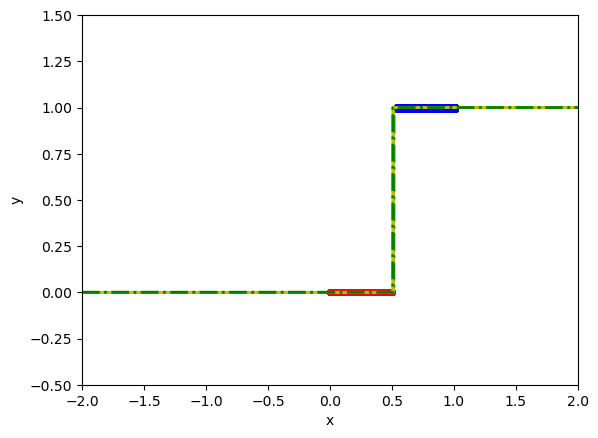

In [124]:
# dth = 0

X0 = X[np.where(Y == 0)]
Y0 = Y[np.where(Y == 0)]
X1 = X[np.where(Y == 1)]
Y1 = Y[np.where(Y == 1)]
# print(f"{X0.shape}")

xx = np.linspace(-2, 2, 10_000)
xx = np.asarray([xx, xx, xx, xx, xx, xx, xx, xx, xx, xx])
b = b_list[-1]
w = w_list[-1]

b1 = b_list_1[-1]
w1 = w_list_1[-1]
# print(f"b:{b} w:{w} -b/w:{-b/w}")
threshold = -b/w
threshold1 = -b1/w1

yy = np.round(sigmoid(np.add(b, np.dot(w, xx))))
yy_c = logistic_regression.predict(xx.T)

yy1 = np.round(sigmoid(np.add(b1, np.dot(w1, xx))))
yy1_c = sgd_classifier.predict(xx.T)

fig, axe = plt.subplots()
axe.plot(X0, Y0, "ro", markersize=4)
axe.plot(X1, Y1, "bs", markersize=4)

axe.axis([-2, 2, -0.5, 1.5])
print(f"threshold: {threshold}")
print(f"threshold1: {threshold1}")

axe.plot(xx.transpose()[:, 0], yy, 'y-', linewidth = 2)
axe.plot(xx.transpose()[:, 0], yy_c, 'g-.', linewidth = 2)

axe.plot(xx.transpose()[:, 0], yy1, 'y-', linewidth = 2)
axe.plot(xx.transpose()[:, 0], yy1, 'g-.', linewidth = 2)
# axe.plot(threshold, [.5], 'y^', markersize = 8)
# axe.xlabel('studying hours')
# axe.ylabel('predicted probability of pass')
axe.set_xlabel("x")
axe.set_ylabel('y')
plt.show()